<a href="https://colab.research.google.com/github/ksdtt/ml-pet-projects/blob/main/decision_trees_phones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 4. Классификация: деревья решений (телефоны)**

1. Загрузите [набор данных о мобильных телефонах:](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
2. Изучите полученный набор данных.
3. Преобразуйте набор данных, подготовив его к применению классификации с помощью дерева решений: 
- выполните минимальные необходимые манипуляции, а также
- отделите столбец с меткой price_range и
- разбейте данные на тренировочный и тестовый наборы.
4. Обучите классификатор DecisionTreeClassifier на тренировочном наборе.
5. Используйте обученную модель на тестовых данных, оцените полученные результаты с помощью нескольких метрик.
6. Визуализируйте и интерпретируйте обученную модель.
7. Нормализуйте данные и обучите дерево на них. Как нормализация повлияла на результаты предсказания?
8. Подберите значения гиперпараметров с помощью RandomizedSearchCV.
9. Сделайте выводы об использовании (плюсах и минусах) деревьев решений для классификации в целом и применительно к рассмотренному набору данных.
10. Примените ансамблевые методы на основе деревьев решений:
- случайный лес RandomForestClassifier,
- AdaBoostClassifier,
- GradientBoostingClassifier (HistGradientBoostingClassifier),
- свой вариант построения, обучения и оценки работы ансамбля.

## **Чтение данных**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

test = pd.read_csv('/content/drive/MyDrive/python/test.csv')

train = pd.read_csv('/content/drive/MyDrive/python/train.csv')

train.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(2000, 21)

## **Описание датасета**

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **Изучение набора данных**

In [ ]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

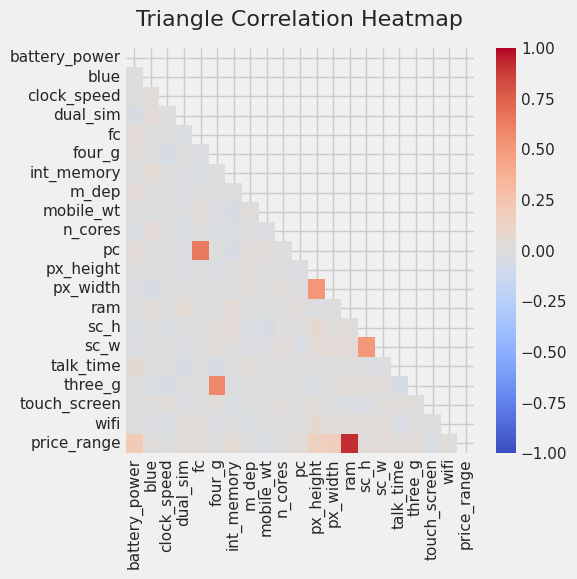

In [ ]:
heatmap = plt.figure(figsize=(5,5))

mask = np.triu(np.ones(train.corr().shape), k=0).astype(bool)
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='coolwarm') 
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':16}, pad=16);

## **Отделение столбца с меткой price_range и разбивка данных на тренировочный и тестовый наборы.**

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop('price_range', axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## **Обучение классификатора DecisionTreeClassifier на тренировочном наборе.**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=8, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=8)

## **Используйте обученную модель на тестовых данных, оцените полученные результаты с помощью нескольких метрик.**


In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.7742857142857142, 0.7633333333333333)

## **Визуализируйте и интерпретируйте обученную модель.**


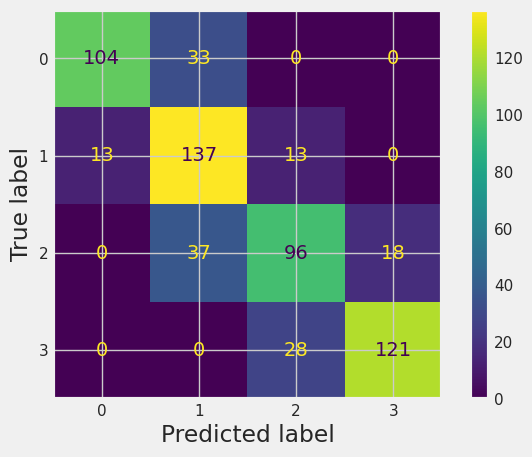

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

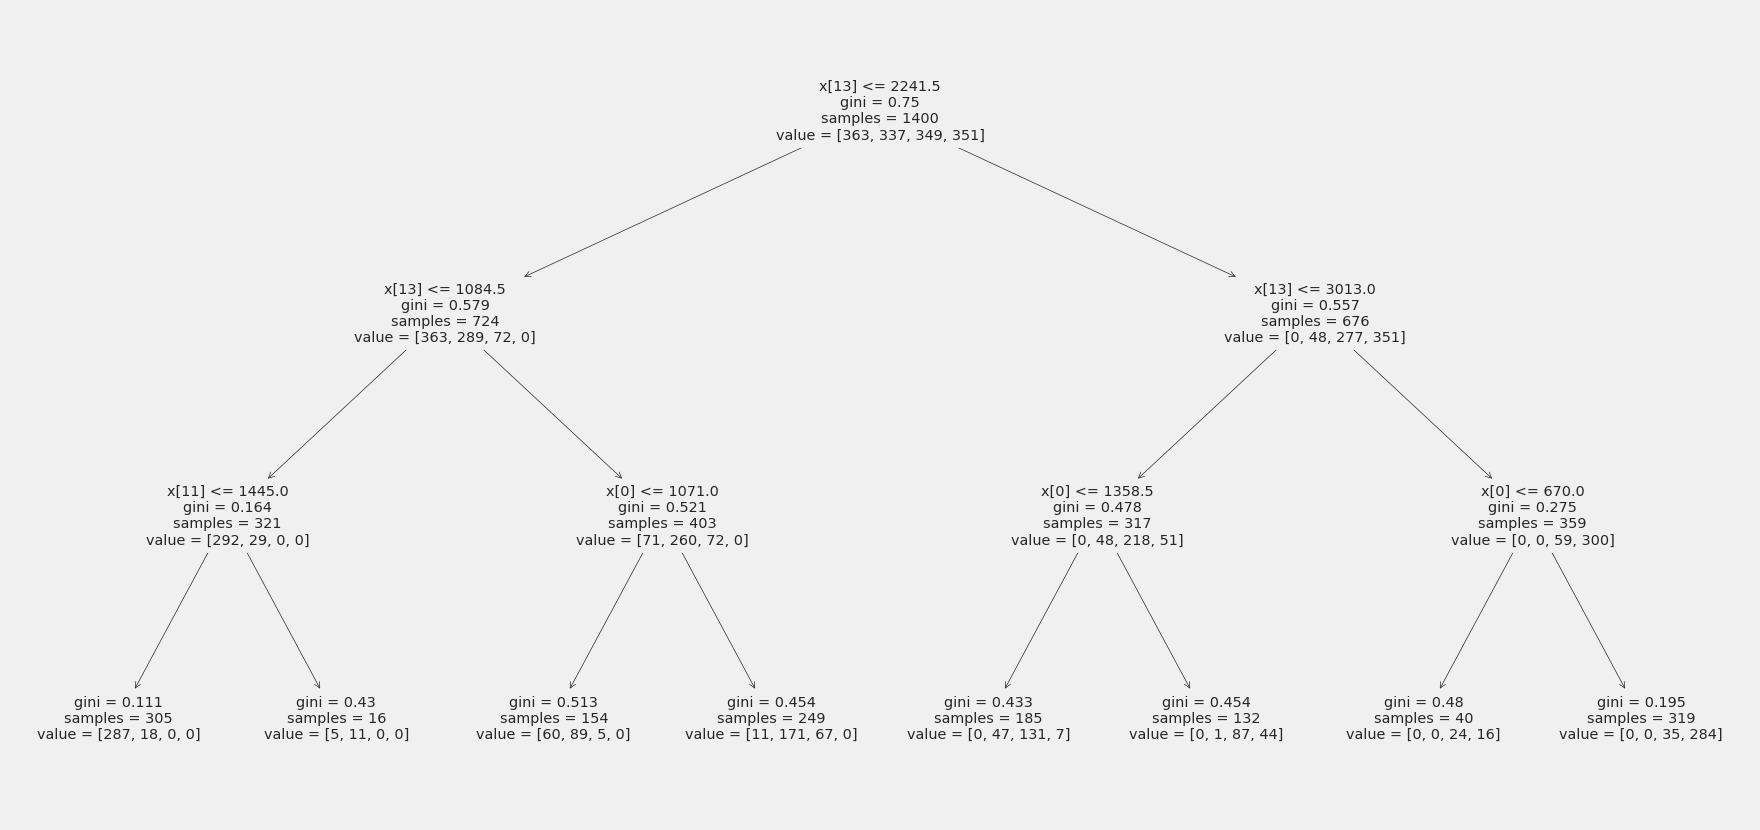

In [ ]:
from sklearn import tree
from graphviz import Source

plt.figure(figsize=(20, 10))
tree.plot_tree(clf)
plt.show()


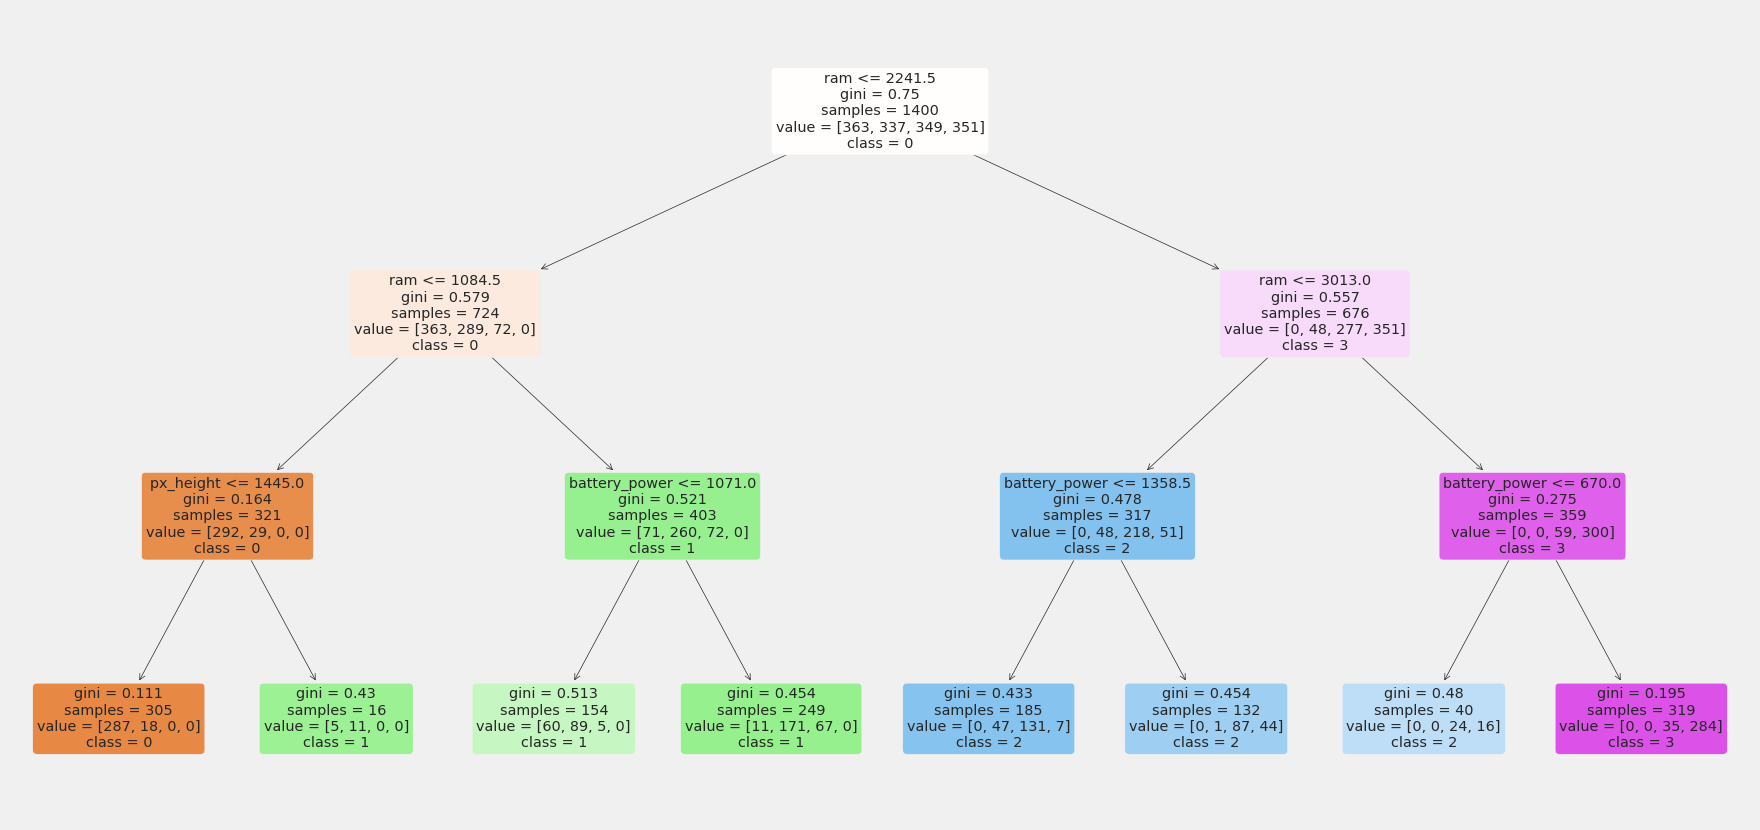

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=clf.feature_names_in_, class_names=[str(x) for x in clf.classes_], rounded=True, filled=True)
plt.show()

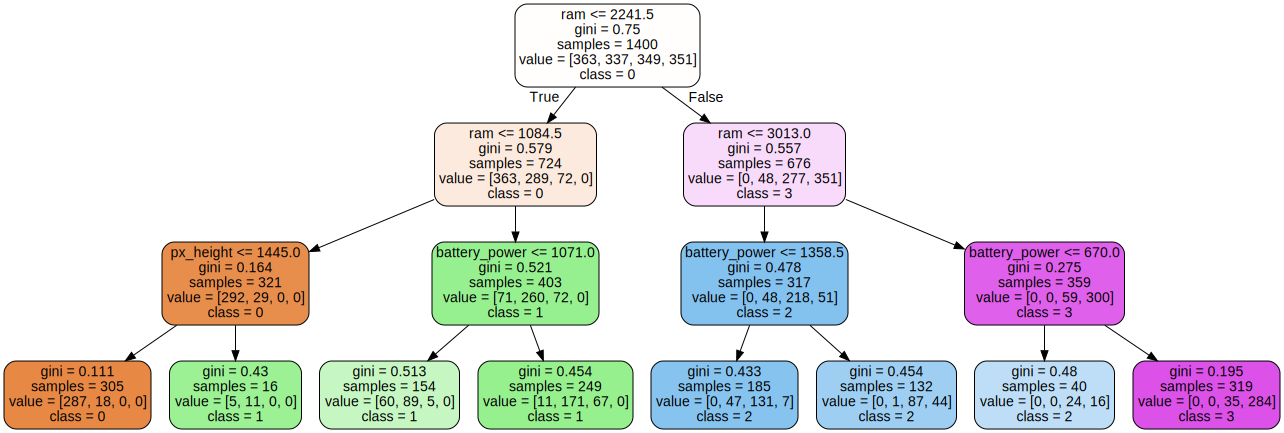

In [ ]:
Source(tree.export_graphviz(clf, out_file=None, feature_names=clf.feature_names_in_, class_names=[str(x) for x in clf.classes_], rounded=True, filled=True))

## **Нормализация и обучение. Влияние нормализации на предсказания**

In [ ]:
X = train.drop('price_range', axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()

X_train = scaler_s.fit_transform(X_train)
X_test = scaler_s.transform(X_test)

clf_s = DecisionTreeClassifier(random_state=8, max_depth=3)
clf_s.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=8)

In [ ]:
clf_s.score(X_train, y_train), clf_s.score(X_test, y_test)

(0.7742857142857142, 0.7633333333333333)

In [ ]:
X = train.drop('price_range', axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

X_train = scaler_mm.fit_transform(X_train)
X_test = scaler_mm.transform(X_test)

clf_minmax = DecisionTreeClassifier(random_state=8, max_depth=3)
clf_minmax.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=8)

In [ ]:
clf_minmax.score(X_train, y_train), clf_minmax.score(X_test, y_test)

(0.7742857142857142, 0.7633333333333333)

## **Подборка значений гиперпараметров с помощью RandomizedSearchCV.**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {"max_depth": [2, 3, 5, 7, 10],
          "max_features": range(1, 30),
          "min_samples_split": [5, 10, 20],
          "min_samples_leaf": [1, 2, 10]}

In [ ]:
rnd_s = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter=200)

In [ ]:
clf_random = rnd_s.fit(X_train, y_train)

In [ ]:
clf_random.score(X_train, y_train), clf_random.score(X_test, y_test)

(0.9042857142857142, 0.8533333333333334)

## **Применение ансамблевых методов на основе деревьев решений:**


### **случайный лес RandomForestClassifier,**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8766666666666667)

### **AdaBoostClassifier,**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.6635714285714286, 0.6816666666666666)

### **GradientBoostingClassifier (HistGradientBoostingClassifier)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9985714285714286, 0.9216666666666666)